<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Leonardo Xavier Pérez Balcorta.

**Fecha:** 18 de Marzo del 2023.

**Expediente** : 720960.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Omarhersan/Tarea4_RJuarezBadillo_LXPerez_OAHernandez

# Tarea 4: Clase 11

## Enunciado de tarea

Terminar los demás numerales faltantes de este ejercicio.

### Ejercicio 1: 

Código de solución estudiante 1

Código de solución estudiante 2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

In [2]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [3]:
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [4]:
np.hstack([train_labels, test_labels]).shape

(506,)

In [5]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [6]:
def IDButton():
    ID = list(set(columns))
    idButton = widgets.Dropdown(options = ID[1:], description = "Column")
    
    return idButton

<AxesSubplot:>

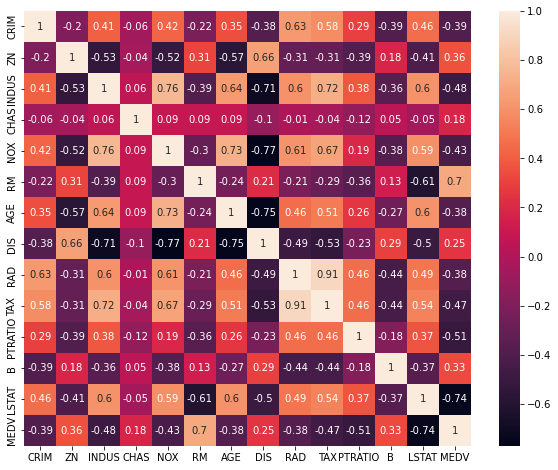

In [7]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

In [8]:
features_cols = IDButton()
output_col = ['MEDV']

In [9]:
features_cols

Dropdown(description='Column', options=('CHAS', 'ZN', 'B', 'DIS', 'CRIM', 'NOX', 'RAD', 'PTRATIO', 'TAX', 'LST…

In [10]:
x = list(features_cols.value)
y = ["".join(x)]
features_cols = y

(466, 2)
(459, 2)


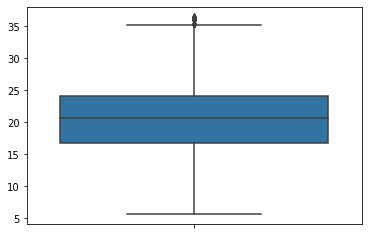

<AxesSubplot:>

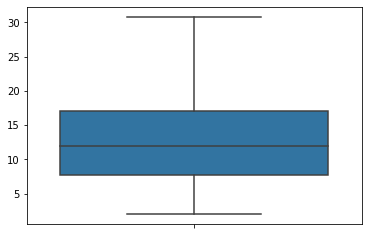

In [11]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data[features_cols + output_col], output_col[0])
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de features
X_out = remove_outliers(y_out, features_cols[0])
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[output_col].values
X_out = X_out[features_cols].values

# Graficar los boxplots finales
sn.boxplot(y=y_out)
plt.show()
sn.boxplot(y=X_out)


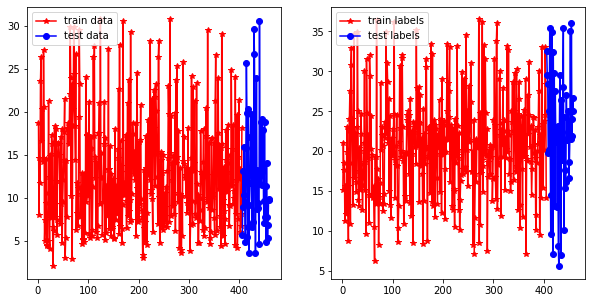

In [12]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [13]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [14]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 9ms/step - loss: 25.7697 - mae: 3.9716
Error cuadrático medio en el conjunto de prueba: 25.769664764404297
Error absoluto medio en el conjunto de prueba: 3.9715802669525146


In [16]:
model_fit.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

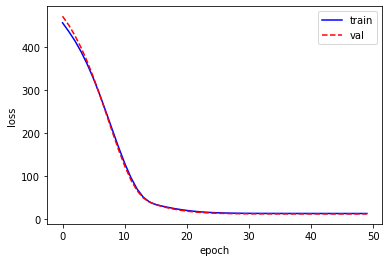

In [17]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

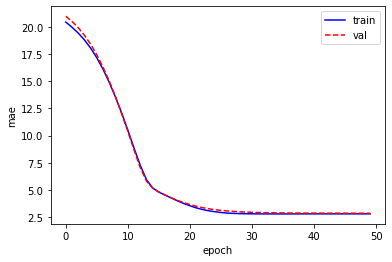

In [18]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [19]:
predicted = model.predict(test_data)

t[TRAIN_SIZE:].shape, test_labels.shape

2/2 [==============================] - 0s 10ms/step


((54,), (54, 1))

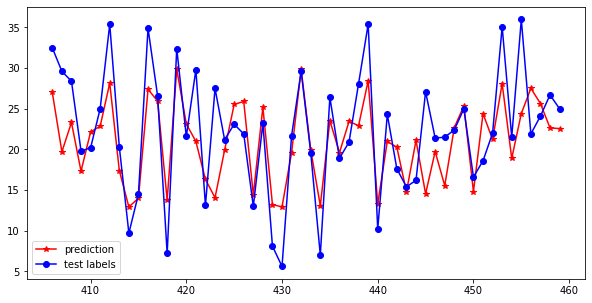

In [20]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

# LSTAT 
Error cuadrático medio en el conjunto de prueba: 25.93532943725586

Error absoluto medio en el conjunto de prueba: 3.980051279067993

# NOX
Error cuadrático medio en el conjunto de prueba: 42.10905838012695

Error absoluto medio en el conjunto de prueba: 5.313328266143799

# ZN
Error cuadrático medio en el conjunto de prueba: 40.58004379272461

Error absoluto medio en el conjunto de prueba: 6.370246887207031

# TAX
Error cuadrático medio en el conjunto de prueba: 35.9538688659668

Error absoluto medio en el conjunto de prueba: 4.875855922698975

# AGE
Error cuadrático medio en el conjunto de prueba: 45.84352493286133

Error absoluto medio en el conjunto de prueba: 5.313596248626709
# DIS
Error cuadrático medio en el conjunto de prueba: 52.39258575439453

Error absoluto medio en el conjunto de prueba: 6.0751166343688965

# RAD
Error cuadrático medio en el conjunto de prueba: 49.61793899536133

Error absoluto medio en el conjunto de prueba: 5.698917388916016

# INDUS
Error cuadrático medio en el conjunto de prueba: 42.0307731628418

Error absoluto medio en el conjunto de prueba: 5.337635517120361
# PTRATIO
Error cuadrático medio en el conjunto de prueba: 39.682769775390625

Error absoluto medio en el conjunto de prueba: 5.215644359588623

Podemos concluir que la mejor variable para poder estimar la serie de tiempo es la variable LSTAT, ya que fue que la obtuvo los errores mas pequeños en el momento del modelaje.

In [ ]:
# Código de solución estudiante 3
.
.
.
.


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........